In [1]:
pip install --user seaborn

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install --user matplotlib

Note: you may need to restart the kernel to use updated packages.


In [3]:
# importing packages
import pandas as pd
import numpy as np
import plotly as py
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
# load data
orders = pd.read_csv('/Users/Mo/instacart/orders.csv')
aisles = pd.read_csv('/Users/Mo/instacart/aisles.csv')
prior_orders = pd.read_csv('/Users/Mo/instacart/order_products_prior.csv')
train_orders = pd.read_csv('/Users/Mo/instacart/order_products_train.csv')
products = pd.read_csv('/Users/Mo/instacart/products.csv')
departments = pd.read_csv('/Users/Mo/instacart/departments.csv')

In [5]:
## display dataframes + their size

display(orders.head())
orders.shape
# 3,421,083 orders

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0


(3421083, 7)

In [6]:
# show aisles dataframe
display(aisles.head())
aisles.shape
# 134 aisles

,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation


(134, 2)

In [7]:
# show prior orders datafram
display(prior_orders.head())
prior_orders.shape
# 32,434,489 prior orders

,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0


(32434489, 4)

In [8]:
# Show training order dataframe
# Probably will not be super useful since we will likely not be doing any ML operations
display(train_orders.head())
train_orders.shape
# 1,384,617 orders TRAINING

,order_id,product_id,add_to_cart_order,reordered
0,1,49302,1,1
1,1,11109,2,1
2,1,10246,3,0
3,1,49683,4,0
4,1,43633,5,1


(1384617, 4)

In [9]:
# show products dataframe
display(products.head())
products.shape
# 49,688 unqiue products

,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13


(49688, 4)

In [10]:
# show deparments dataframe
display(departments.head(21))
departments.shape
# 21 departments

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol
5,6,international
6,7,beverages
7,8,pets
8,9,dry goods pasta
9,10,bulk


(21, 2)

Data Cleaning
====


In [11]:
# checking for dtypes and null values for each data set
orders.info()
orders.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3421083 entries, 0 to 3421082
Data columns (total 7 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   order_id                int64  
 1   user_id                 int64  
 2   eval_set                object 
 3   order_number            int64  
 4   order_dow               int64  
 5   order_hour_of_day       int64  
 6   days_since_prior_order  float64
dtypes: float64(1), int64(5), object(1)
memory usage: 182.7+ MB


order_id                       0
user_id                        0
eval_set                       0
order_number                   0
order_dow                      0
order_hour_of_day              0
days_since_prior_order    206209
dtype: int64

In [12]:
aisles.info()
aisles.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   aisle_id  134 non-null    int64 
 1   aisle     134 non-null    object
dtypes: int64(1), object(1)
memory usage: 2.2+ KB


aisle_id    0
aisle       0
dtype: int64

In [13]:
prior_orders.info()
prior_orders.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32434489 entries, 0 to 32434488
Data columns (total 4 columns):
 #   Column             Dtype
---  ------             -----
 0   order_id           int64
 1   product_id         int64
 2   add_to_cart_order  int64
 3   reordered          int64
dtypes: int64(4)
memory usage: 989.8 MB


order_id             0
product_id           0
add_to_cart_order    0
reordered            0
dtype: int64

In [14]:
train_orders.info()
train_orders.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1384617 entries, 0 to 1384616
Data columns (total 4 columns):
 #   Column             Non-Null Count    Dtype
---  ------             --------------    -----
 0   order_id           1384617 non-null  int64
 1   product_id         1384617 non-null  int64
 2   add_to_cart_order  1384617 non-null  int64
 3   reordered          1384617 non-null  int64
dtypes: int64(4)
memory usage: 42.3 MB


order_id             0
product_id           0
add_to_cart_order    0
reordered            0
dtype: int64

In [15]:
products.info()
products.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49688 entries, 0 to 49687
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   product_id     49688 non-null  int64 
 1   product_name   49688 non-null  object
 2   aisle_id       49688 non-null  int64 
 3   department_id  49688 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


product_id       0
product_name     0
aisle_id         0
department_id    0
dtype: int64

In [16]:
departments.info()
departments.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   department_id  21 non-null     int64 
 1   department     21 non-null     object
dtypes: int64(1), object(1)
memory usage: 464.0+ bytes


department_id    0
department       0
dtype: int64

Only missing values are in 'orders' and has 206,209 missing values in 'days since last order'. This is out of over 3 million so it shoud not have a huge affect on our data. Considering we might not get to explore this data we will keep it in rather than get rid of some other data that might be useful.

Seperating variables into numerical and categorical variables
--> only object dtypes are: val_set, aisle, product_name, and department
--> rest of the variables are numerical

Some variables are repeated in each data set so I will merge those respective variables in to a single data set

In [17]:
# Merging 'products' with 'aisles'
products = pd.merge(aisles, products, on = "aisle_id")
display(products.head())

,aisle_id,aisle,product_id,product_name,department_id
0,1,prepared soups salads,209,Italian Pasta Salad,20
1,1,prepared soups salads,554,Turkey Chili,20
2,1,prepared soups salads,886,Whole Grain Salad with Roasted Pecans & Mango ...,20
3,1,prepared soups salads,1600,Mediterranean Orzo Salad,20
4,1,prepared soups salads,2539,Original Potato Salad,20


Now we have products ordered by aisle number.

In [18]:
# Merging 'products' with 'departments'
products = pd.merge(departments, products, on = "department_id")
display(products.head())

,department_id,department,aisle_id,aisle,product_id,product_name
0,1,frozen,34,frozen meat seafood,118,Ground Turkey Chub
1,1,frozen,34,frozen meat seafood,383,Breaded Chicken Breast Tenders
2,1,frozen,34,frozen meat seafood,402,100% Pure Beef Homestyle Patties
3,1,frozen,34,frozen meat seafood,625,"Chicken Breast Nuggets, Dinosaur Shaped"
4,1,frozen,34,frozen meat seafood,831,All Natural Premium Cornish Hen


Now products are ordered by department.

Since our products have all necessary information we can merge them into our 'orders' data sets.

In [19]:
prior_orders.head() # we can integrate information about ordered products by merging products dataframe with prior_orders/train_orders

,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0


In [20]:
train_orders.head()

,order_id,product_id,add_to_cart_order,reordered
0,1,49302,1,1
1,1,11109,2,1
2,1,10246,3,0
3,1,49683,4,0
4,1,43633,5,1


In [21]:
# merge products and prior_orders using common 'producst_id'
products_prior = pd.merge(prior_orders, products, on = "product_id")
products_prior.head()

,order_id,product_id,add_to_cart_order,reordered,department_id,department,aisle_id,aisle,product_name
0,2,33120,1,1,16,dairy eggs,86,eggs,Organic Egg Whites
1,26,33120,5,0,16,dairy eggs,86,eggs,Organic Egg Whites
2,120,33120,13,0,16,dairy eggs,86,eggs,Organic Egg Whites
3,327,33120,5,1,16,dairy eggs,86,eggs,Organic Egg Whites
4,390,33120,28,1,16,dairy eggs,86,eggs,Organic Egg Whites


In [22]:
# merge products and train_orders using common 'product_id'
products_train = pd.merge(train_orders, products, on = "product_id")
products_train.head()

,order_id,product_id,add_to_cart_order,reordered,department_id,department,aisle_id,aisle,product_name
0,1,49302,1,1,16,dairy eggs,120,yogurt,Bulgarian Yogurt
1,816049,49302,7,1,16,dairy eggs,120,yogurt,Bulgarian Yogurt
2,1242203,49302,1,1,16,dairy eggs,120,yogurt,Bulgarian Yogurt
3,1383349,49302,11,1,16,dairy eggs,120,yogurt,Bulgarian Yogurt
4,1787378,49302,8,0,16,dairy eggs,120,yogurt,Bulgarian Yogurt


In [23]:
# check for null values again
products_prior.isnull().sum()

order_id             0
product_id           0
add_to_cart_order    0
reordered            0
department_id        0
department           0
aisle_id             0
aisle                0
product_name         0
dtype: int64

In [24]:
products_train.isnull().sum()

order_id             0
product_id           0
add_to_cart_order    0
reordered            0
department_id        0
department           0
aisle_id             0
aisle                0
product_name         0
dtype: int64

In [25]:
# check size again
products_prior.shape

(32434489, 9)

In [26]:
products_train.shape

(1384617, 9)

Data Exploration
===

Question: How much does each department contribute to the total number of online orders?

In [27]:
# we will first visualize the consumer activity as a function of each department
products.head()

,department_id,department,aisle_id,aisle,product_id,product_name
0,1,frozen,34,frozen meat seafood,118,Ground Turkey Chub
1,1,frozen,34,frozen meat seafood,383,Breaded Chicken Breast Tenders
2,1,frozen,34,frozen meat seafood,402,100% Pure Beef Homestyle Patties
3,1,frozen,34,frozen meat seafood,625,"Chicken Breast Nuggets, Dinosaur Shaped"
4,1,frozen,34,frozen meat seafood,831,All Natural Premium Cornish Hen


In [28]:
# turn department_id orders to value counts
department_activity = products['department'].value_counts().rename_axis('department').reset_index(name='Number of orders')
department_activity.head(30)


,department,Number of orders
0,personal care,6563
1,snacks,6264
2,pantry,5371
3,beverages,4365
4,frozen,4007
5,dairy eggs,3449
6,household,3085
7,canned goods,2092
8,dry goods pasta,1858
9,produce,1684


Text(0.5, 1.0, 'Department Activity')

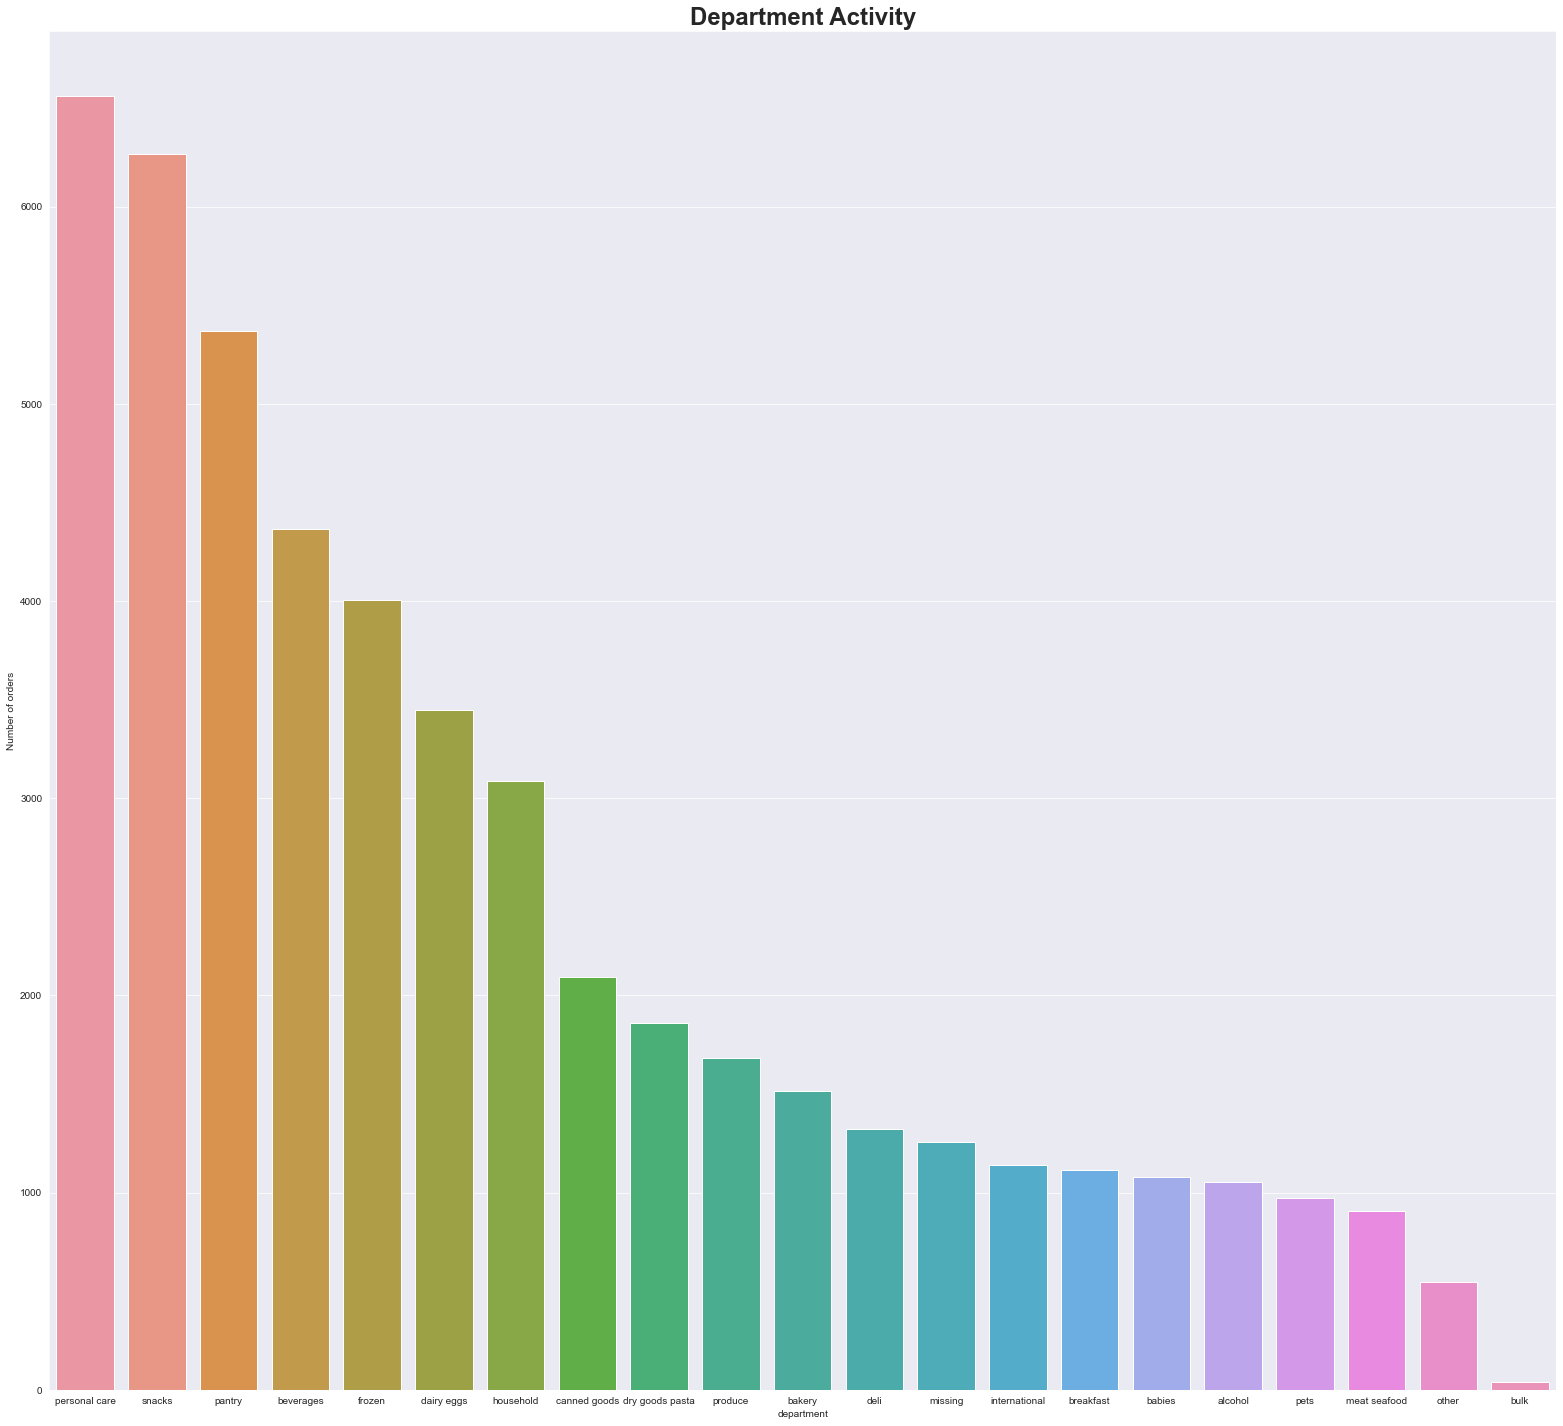

In [29]:
# Bar plot distribution of number of orders for each department
plt.figure(figsize=(27,25))
sns.set_style('darkgrid')
bar = sns.barplot(x='department', y='Number of orders', data = department_activity)
bar.set_title('Department Activity',fontdict= { 'fontsize': 24, 'fontweight':'bold'})

From this barplot we can see that the top five consumed items come from the 'personal care','snacks', 'pantry', 'beverages', and 'frozen' foods departments. After that, the volume of orders drops off dramatically for all other departments.

Question: What products are the most popular? (Top 15)

Our first goal will be to concatenate product names with the number of orders that was made according to the prior_orders data set.

In [30]:
# merge products and aisles using common 'aisle_id'
product_aisle = pd.merge(aisles, products, on="aisle_id") # merge aisle data set with products
product_aisle.head()

,aisle_id,aisle_x,department_id,department,aisle_y,product_id,product_name
0,1,prepared soups salads,20,deli,prepared soups salads,209,Italian Pasta Salad
1,1,prepared soups salads,20,deli,prepared soups salads,554,Turkey Chili
2,1,prepared soups salads,20,deli,prepared soups salads,886,Whole Grain Salad with Roasted Pecans & Mango ...
3,1,prepared soups salads,20,deli,prepared soups salads,1600,Mediterranean Orzo Salad
4,1,prepared soups salads,20,deli,prepared soups salads,2539,Original Potato Salad


In [31]:
# merge product_aisle and prior_orders using common 'product_id'
product_aisle_porders = pd.merge(prior_orders, product_aisle, on='product_id')
product_aisle_porders.head()

,order_id,product_id,add_to_cart_order,reordered,aisle_id,aisle_x,department_id,department,aisle_y,product_name
0,2,33120,1,1,86,eggs,16,dairy eggs,eggs,Organic Egg Whites
1,26,33120,5,0,86,eggs,16,dairy eggs,eggs,Organic Egg Whites
2,120,33120,13,0,86,eggs,16,dairy eggs,eggs,Organic Egg Whites
3,327,33120,5,1,86,eggs,16,dairy eggs,eggs,Organic Egg Whites
4,390,33120,28,1,86,eggs,16,dairy eggs,eggs,Organic Egg Whites


In [32]:
product_aisle_porders.drop(['aisle_y'], axis=1) # getting rid of the extra aisle column (aisle_y)

,order_id,product_id,add_to_cart_order,reordered,aisle_id,aisle_x,department_id,department,product_name
0,2,33120,1,1,86,eggs,16,dairy eggs,Organic Egg Whites
1,26,33120,5,0,86,eggs,16,dairy eggs,Organic Egg Whites
2,120,33120,13,0,86,eggs,16,dairy eggs,Organic Egg Whites
3,327,33120,5,1,86,eggs,16,dairy eggs,Organic Egg Whites
4,390,33120,28,1,86,eggs,16,dairy eggs,Organic Egg Whites
...,...,...,...,...,...,...,...,...,...
32434484,3265099,43492,3,0,104,spices seasonings,13,pantry,Gourmet Burger Seasoning
32434485,3361945,43492,19,0,104,spices seasonings,13,pantry,Gourmet Burger Seasoning
32434486,3267201,33097,2,0,81,canned jarred vegetables,15,canned goods,Piquillo & Jalapeno Bruschetta
32434487,3393151,38977,32,0,100,missing,21,missing,Original Jerky


In [33]:
# Count how many product names are repeatedly ordered
# Extract the top 15 products
popular_items = product_aisle_porders['product_name'].value_counts().rename_axis('Product Name').reset_index(name='Number of orders')
popular_items = popular_items.nlargest(15,'Number of orders')
popular_items.head(16)

,Product Name,Number of orders
0,Banana,472565
1,Bag of Organic Bananas,379450
2,Organic Strawberries,264683
3,Organic Baby Spinach,241921
4,Organic Hass Avocado,213584
5,Organic Avocado,176815
6,Large Lemon,152657
7,Strawberries,142951
8,Limes,140627
9,Organic Whole Milk,137905


Text(0.5, 1.0, 'Top 15 Items')

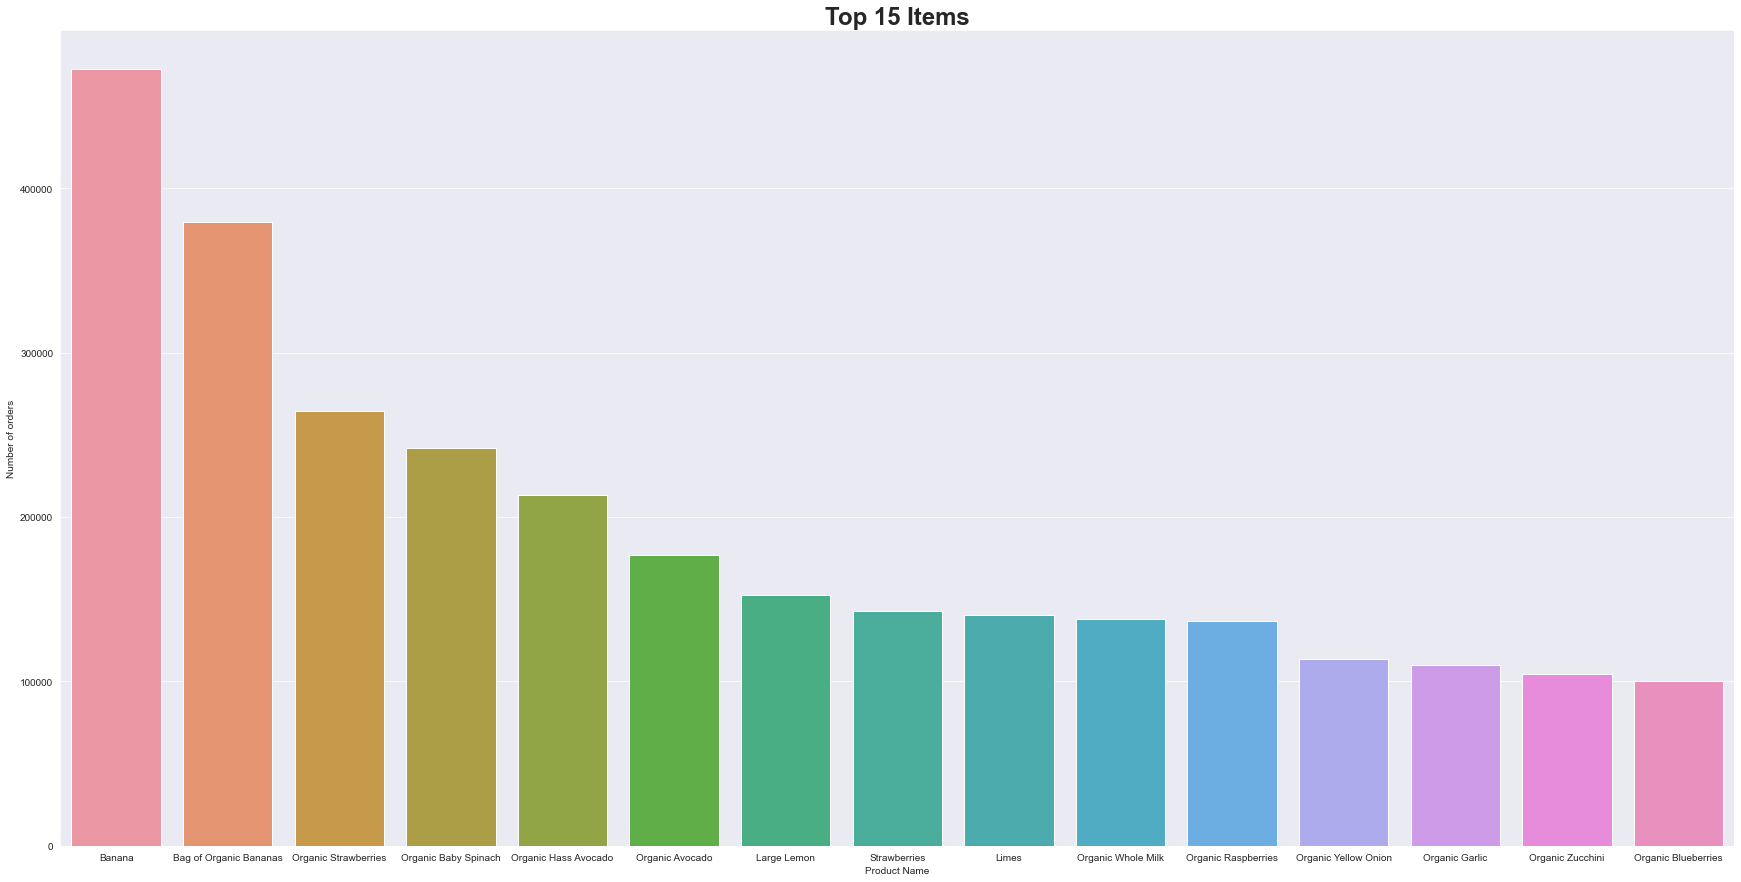

In [34]:
# Plot top 15 products 
plt.figure(figsize=(30,15))
sns.set_style('darkgrid')
bar = sns.barplot(x='Product Name', y='Number of orders', data = popular_items)
bar.set_title('Top 15 Items',fontdict= { 'fontsize': 24, 'fontweight':'bold'})

Contrary to what our department activity graph indicated, this plot shows that fruits (Under the produce department) are among the most purchased items. This is odd because in our department activity department, the produce department was the 10th most active department.

This could be due to the fact that our department activity plot was not concatanted with our prior orders dataset and therefore was not as accurate. Let's test this.

In [35]:
# Count how many times people order from a department
popular_departments = product_aisle_porders['department'].value_counts().rename_axis('Department').reset_index(name='Number of orders')
popular_departments.head()

,Department,Number of orders
0,produce,9479291
1,dairy eggs,5414016
2,snacks,2887550
3,beverages,2690129
4,frozen,2236432


Text(0.5, 1.0, 'Department activity (Prior orders dataset)')

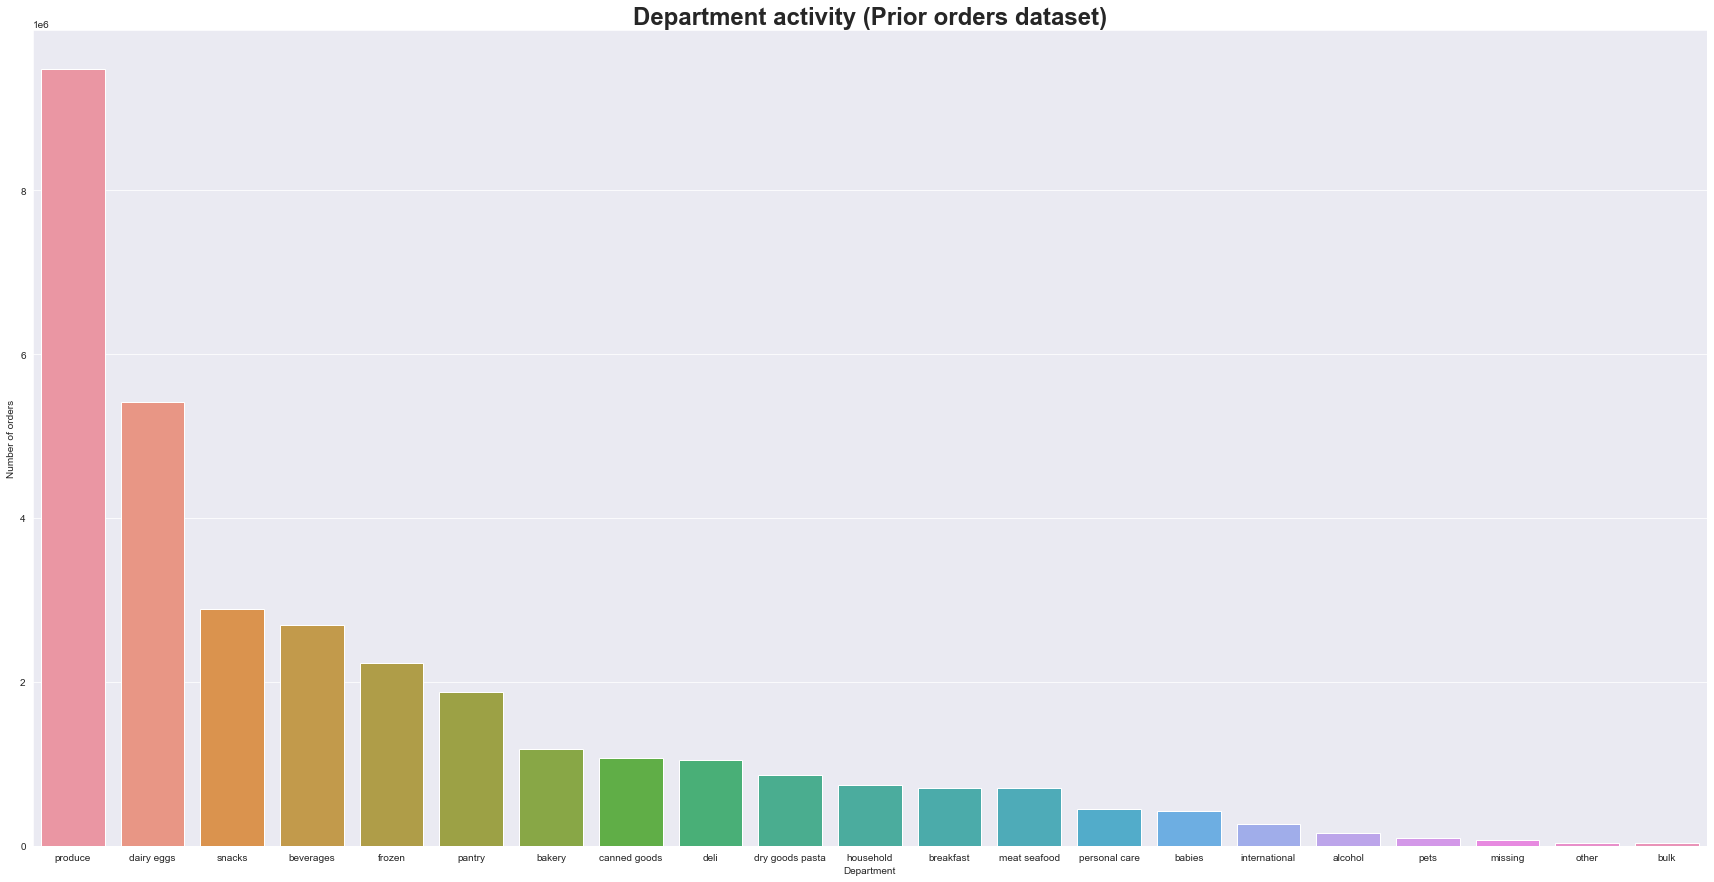

In [36]:
# Plot department activity over prior orders
plt.figure(figsize=(30,15))
sns.set_style('darkgrid')
bar = sns.barplot(x='Department', y='Number of orders', data = popular_departments)
bar.set_title('Department activity (Prior orders dataset)',fontdict= { 'fontsize': 24, 'fontweight':'bold'})

There we go! This lines up much better with our Top 15 items plot, indicating that produce department is actually the most active.

Let's now turn our attention to the 'Orders' dataset. This dataset includes variables such as (day since last order), (time of purchase), and (day of purchase). This info can give us alot of useful knowledge about consumer behavior.

Question: What days of the week do people tend to order the most?

In [37]:
# Overview of orders
orders.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0


In [38]:
# Count number of time order was placed on a given day of the week
week_activity = orders['order_dow'].value_counts().rename_axis('Day of Week (0 = Sunday)').reset_index(name='Number of orders')
week_activity.head(7)

,Day of Week (0 = Sunday),Number of orders
0,0,600905
1,1,587478
2,2,467260
3,5,453368
4,6,448761
5,3,436972
6,4,426339


Text(0.5, 1.0, 'Day of Week Activity')

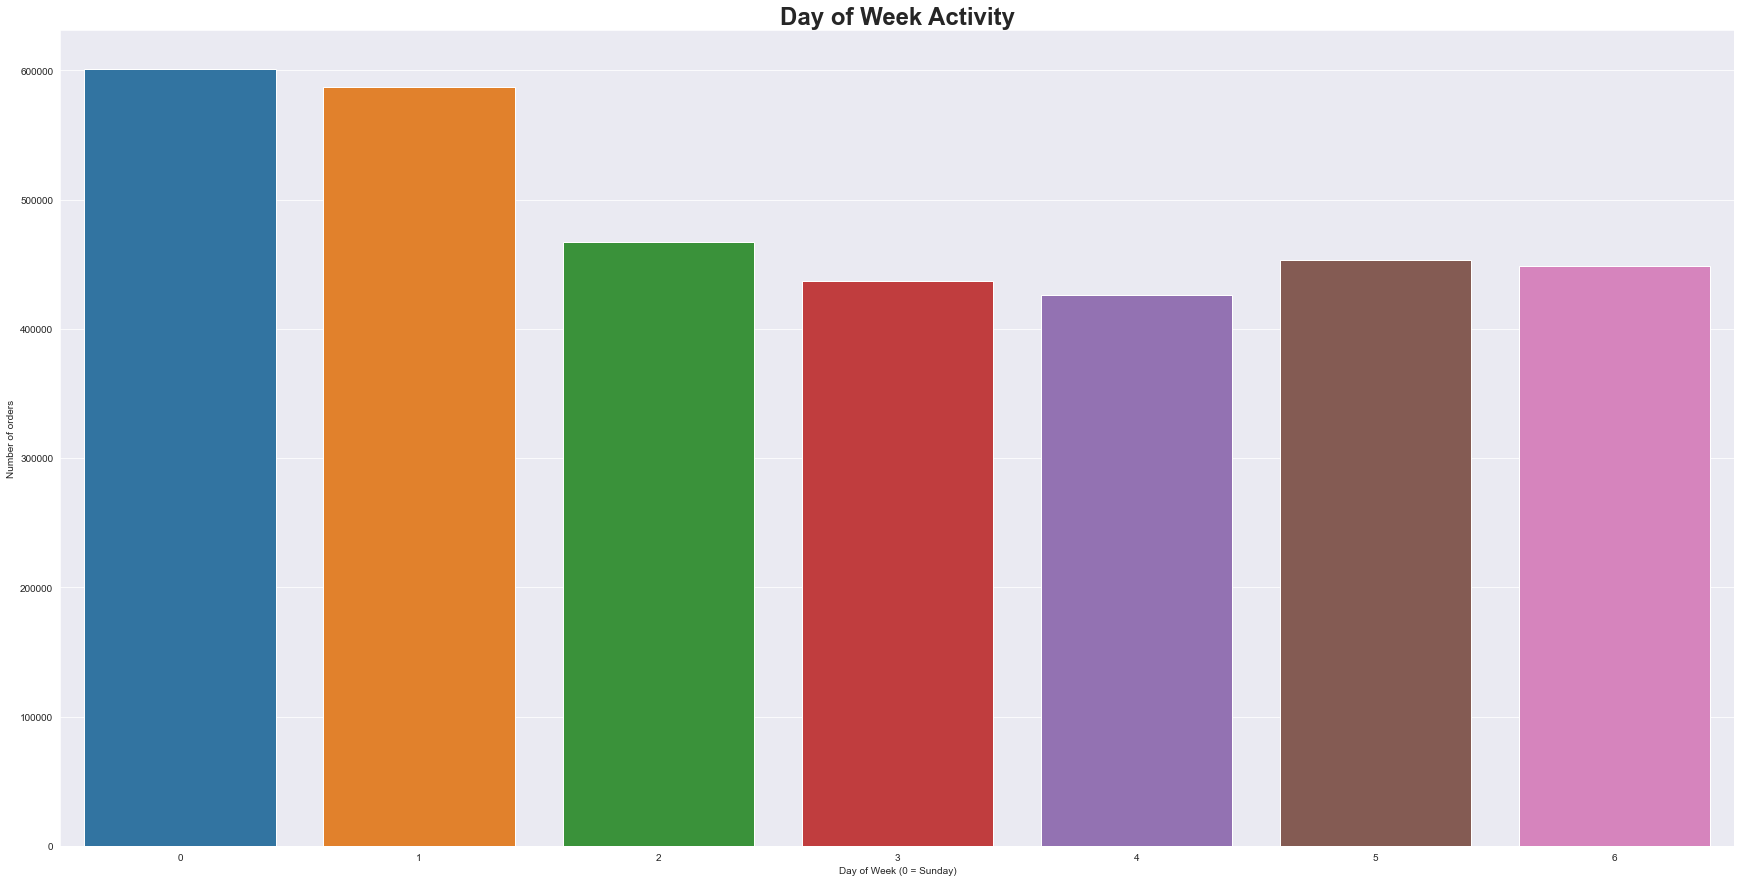

In [39]:
 # Plot weekly order activity
plt.figure(figsize=(30,15))
sns.set_style('darkgrid')
bar = sns.barplot(x='Day of Week (0 = Sunday)', y='Number of orders', data = week_activity)
bar.set_title('Day of Week Activity',fontdict= { 'fontsize': 24, 'fontweight':'bold'})

Hmm. Seems Sunday and Monday are the busiest days, but not by much compared to the rest of the week.

Let's try looking a little closer and figure out which department is the busiest throughout the week!

In [40]:
# # merge product_aisle data set with prior_orders under common 'order_id'
product_aisle_orders = pd.merge(orders, product_aisle_porders, on='order_id') 
product_aisle_orders.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,aisle_id,aisle_x,department_id,department,aisle_y,product_name
0,2539329,1,prior,1,2,8,NaN,196,1,0,77,soft drinks,7,beverages,soft drinks,Soda
1,2539329,1,prior,1,2,8,NaN,14084,2,0,91,soy lactosefree,16,dairy eggs,soy lactosefree,Organic Unsweetened Vanilla Almond Milk
2,2539329,1,prior,1,2,8,NaN,26088,4,0,23,popcorn jerky,19,snacks,popcorn jerky,Aged White Cheddar Popcorn
3,2539329,1,prior,1,2,8,NaN,12427,3,0,23,popcorn jerky,19,snacks,popcorn jerky,Original Beef Jerky
4,2539329,1,prior,1,2,8,NaN,26405,5,0,54,paper goods,17,household,paper goods,XL Pick-A-Size Paper Towel Rolls


In [41]:
product_aisle_orders.drop(['aisle_y'], axis=1) # getting rid of the extra aisle column (aisle_y)

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,aisle_id,aisle_x,department_id,department,product_name
0,2539329,1,prior,1,2,8,NaN,196,1,0,77,soft drinks,7,beverages,Soda
1,2539329,1,prior,1,2,8,NaN,14084,2,0,91,soy lactosefree,16,dairy eggs,Organic Unsweetened Vanilla Almond Milk
2,2539329,1,prior,1,2,8,NaN,26088,4,0,23,popcorn jerky,19,snacks,Aged White Cheddar Popcorn
3,2539329,1,prior,1,2,8,NaN,12427,3,0,23,popcorn jerky,19,snacks,Original Beef Jerky
4,2539329,1,prior,1,2,8,NaN,26405,5,0,54,paper goods,17,household,XL Pick-A-Size Paper Towel Rolls
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32434484,2977660,206209,prior,13,1,12,7.0,31477,7,0,3,energy granola bars,19,snacks,High Protein Bar Chunky Peanut Butter
32434485,2977660,206209,prior,13,1,12,7.0,39216,4,0,121,cereal,14,breakfast,Original Multigrain Spoonfuls Cereal
32434486,2977660,206209,prior,13,1,12,7.0,9405,2,1,91,soy lactosefree,16,dairy eggs,Calcium Enriched 100% Lactose Free Fat Free Milk
32434487,2977660,206209,prior,13,1,12,7.0,6567,8,0,3,energy granola bars,19,snacks,Chocolate Peanut Butter Protein Bar


In [42]:
# extract department + their order_id under day of week purchase
department_dow = product_aisle_orders.groupby(['order_dow','department'])['order_id'].count().reset_index()
department_dow.head()

,order_dow,department,order_id
0,0,alcohol,17437
1,0,babies,81622
2,0,bakery,225382
3,0,beverages,433110
4,0,breakfast,127162


In [43]:
# Create new column with the proportion of orders that each department makes
department_dow['proportion'] = department_dow['order_id']/department_dow['order_id'].sum()
department_dow.head()

,order_dow,department,order_id,proportion
0,0,alcohol,17437,0.000538
1,0,babies,81622,0.002517
2,0,bakery,225382,0.006949
3,0,beverages,433110,0.013353
4,0,breakfast,127162,0.003921


<Figure size 2880x3600 with 0 Axes>

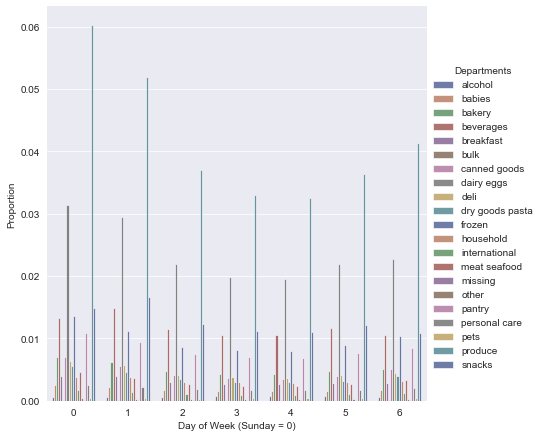

In [44]:
# Plot department activity for everyday of the week
plt.figure(figsize=(40,50))
g = sns.catplot(
    data=department_dow, kind="bar",
    x="order_dow", y="proportion", hue="department",
    ci="sd", palette="dark", alpha=.6, height=6
)
g.despine(left=True)
g.set_axis_labels("Day of Week (Sunday = 0)", "Proportion")
g.legend.set_title("Departments")

Looks like department follows the same trend as shown in department trnd where produce, frozen foods, pantry and snacks are among the most popular all across Sunday-Saturday.

Question: What about number of orders as a function of time of day?

In [45]:
# Count number of times orders are placed during each hour
time_activity = orders['order_hour_of_day'].value_counts().rename_axis('Hour of day (0 = 12:00AM)').reset_index(name='Number of orders')
time_activity.head()

,Hour of day (0 = 12:00AM),Number of orders
0,10,288418
1,11,284728
2,15,283639
3,14,283042
4,13,277999


Text(0.5, 1.0, 'Time of Day Activity')

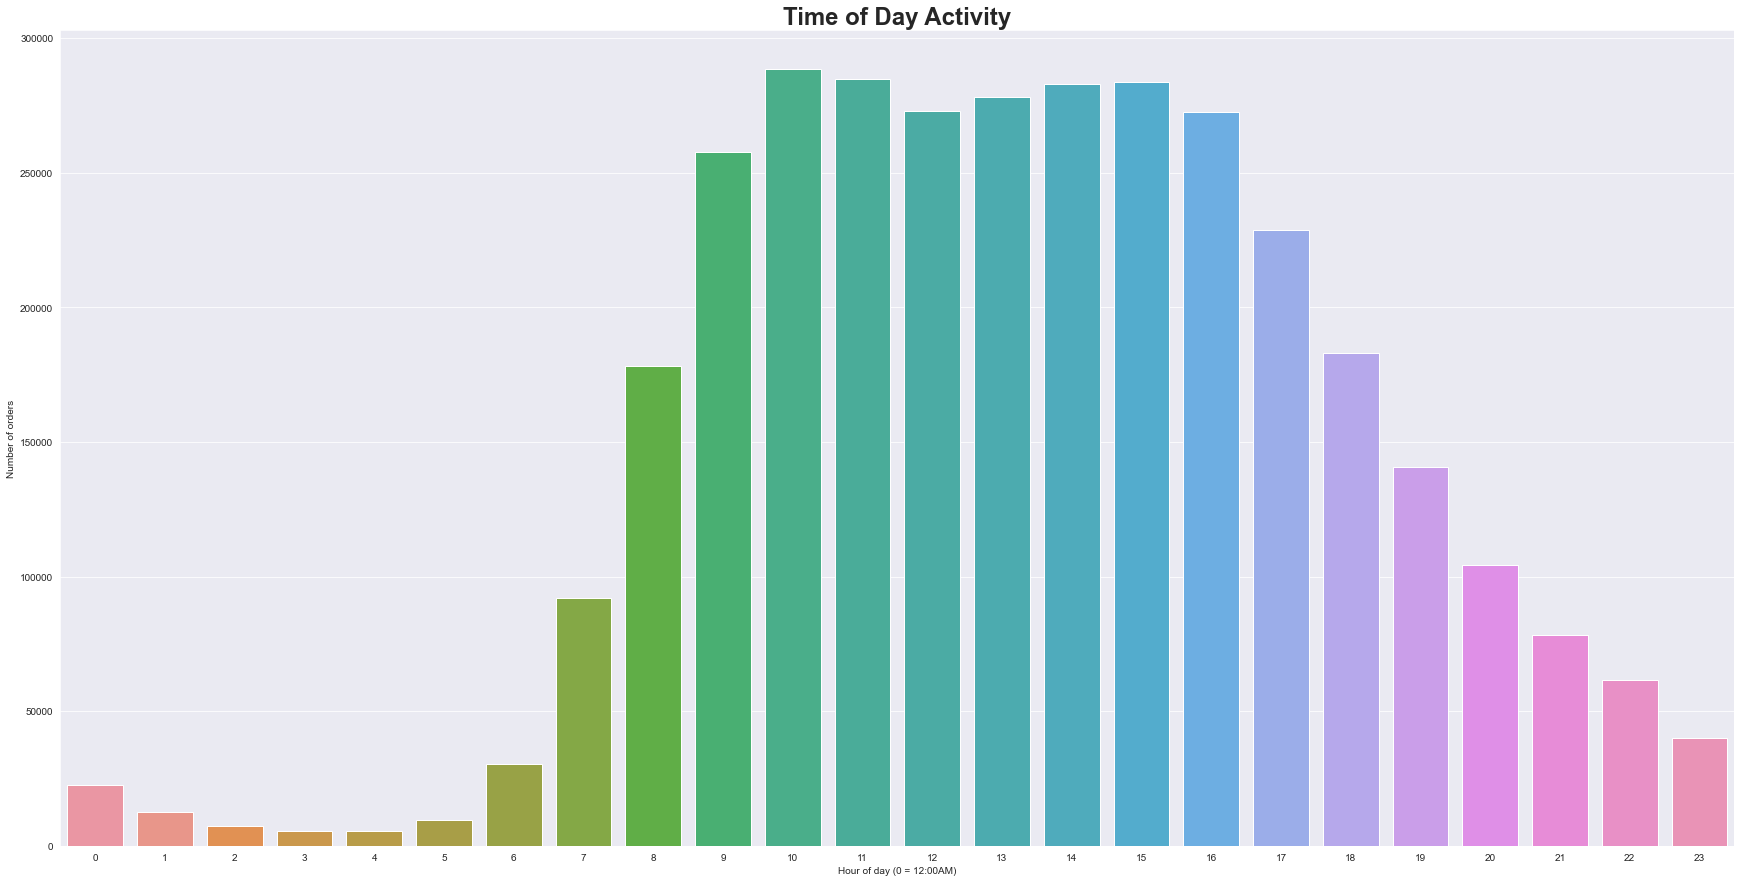

In [46]:
# Plot showing activity across time of day
plt.figure(figsize=(30,15))
sns.set_style('darkgrid')
bar = sns.barplot(x='Hour of day (0 = 12:00AM)', y='Number of orders', data = time_activity)
bar.set_title('Time of Day Activity',fontdict= { 'fontsize': 24, 'fontweight':'bold'})

Here we can see that the largest number of orders are made between 10AM and 5PM.

Now let's once again consider department activity but now as a function of time of day!

In [47]:
# Extract department+order_id+proportion with time of day columns 
department_TOD = product_aisle_orders.groupby(['order_hour_of_day','department'])['order_id'].count().reset_index()
department_TOD['proportion'] = department_TOD['order_id']/department_TOD['order_id'].sum()
department_TOD.head()

,order_hour_of_day,department,order_id,proportion
0,0,alcohol,501,0.000015
1,0,babies,2400,0.000074
2,0,bakery,7326,0.000226
3,0,beverages,17575,0.000542
4,0,breakfast,4368,0.000135


Text(0.5, 1.0, 'Hourly Department Activity')

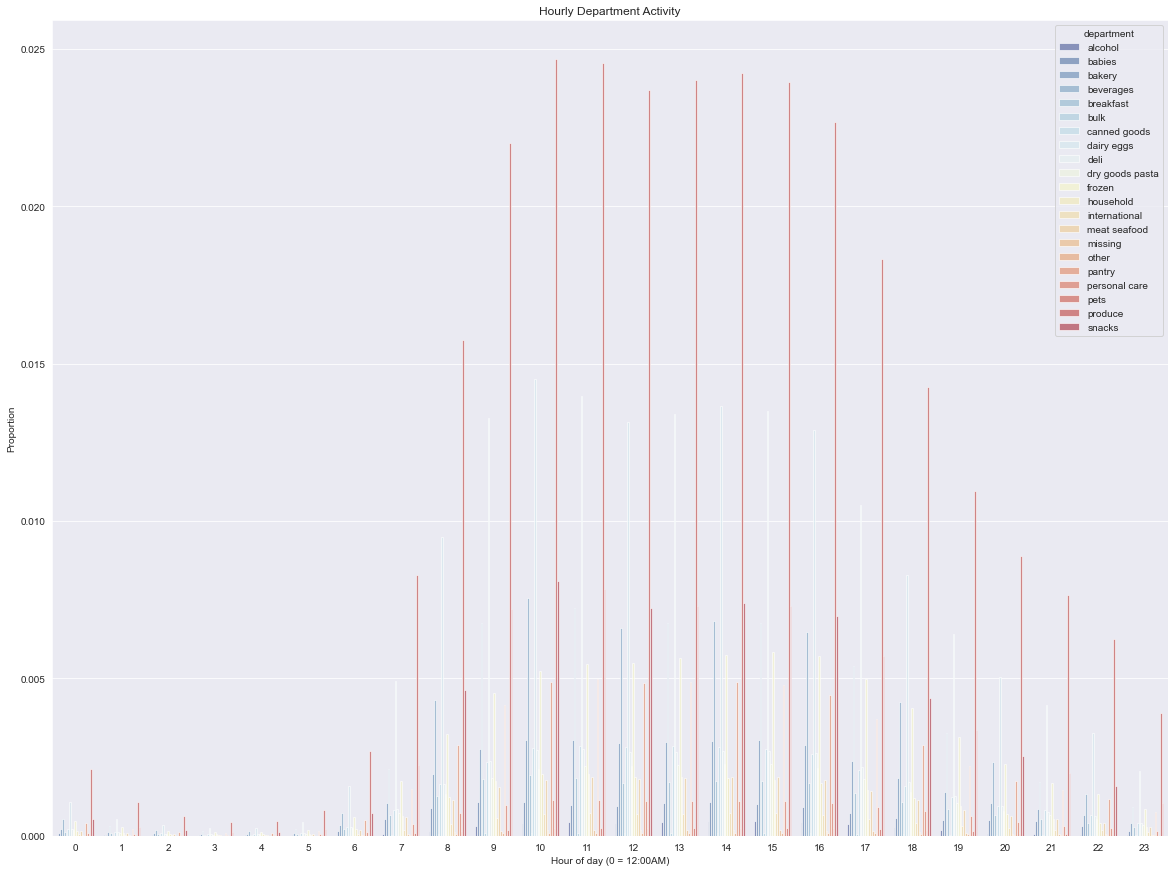

In [48]:
# Plot department activity for every hour of the day
plt.figure(figsize=(20,15))
g = sns.barplot(x="order_hour_of_day", y="proportion", data=department_TOD, hue="department",
    ci="", palette="RdYlBu_r", alpha=.6
)
g.set(xlabel="Hour of day (0 = 12:00AM)", ylabel="Proportion")
plt.title("Hourly Department Activity")

It seems Produce and snacks still follow a proportional trend to the amount of orders in a day. However it seems that Dairy eggs and Deli activity seems to fluctuate from one hour to the next. For example at 10AM Dairy eggs sells much more than Deli but at 11AM Deli sells much more than Dairy eggs. This is interesting..

Another thing that might be interesting to look at is how many orders are actually placed by individuals

Question: What is the average number of orders placed per customer?

In [49]:
orders.head() # overview of orders

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0


In [50]:
orders_percustomer = orders.groupby('user_id',)['order_number'].max().reset_index()
orders_percustomer.head()

,user_id,order_number
0,1,11
1,2,15
2,3,13
3,4,6
4,5,5


C:\Users\Mo\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Order History Per Customer')

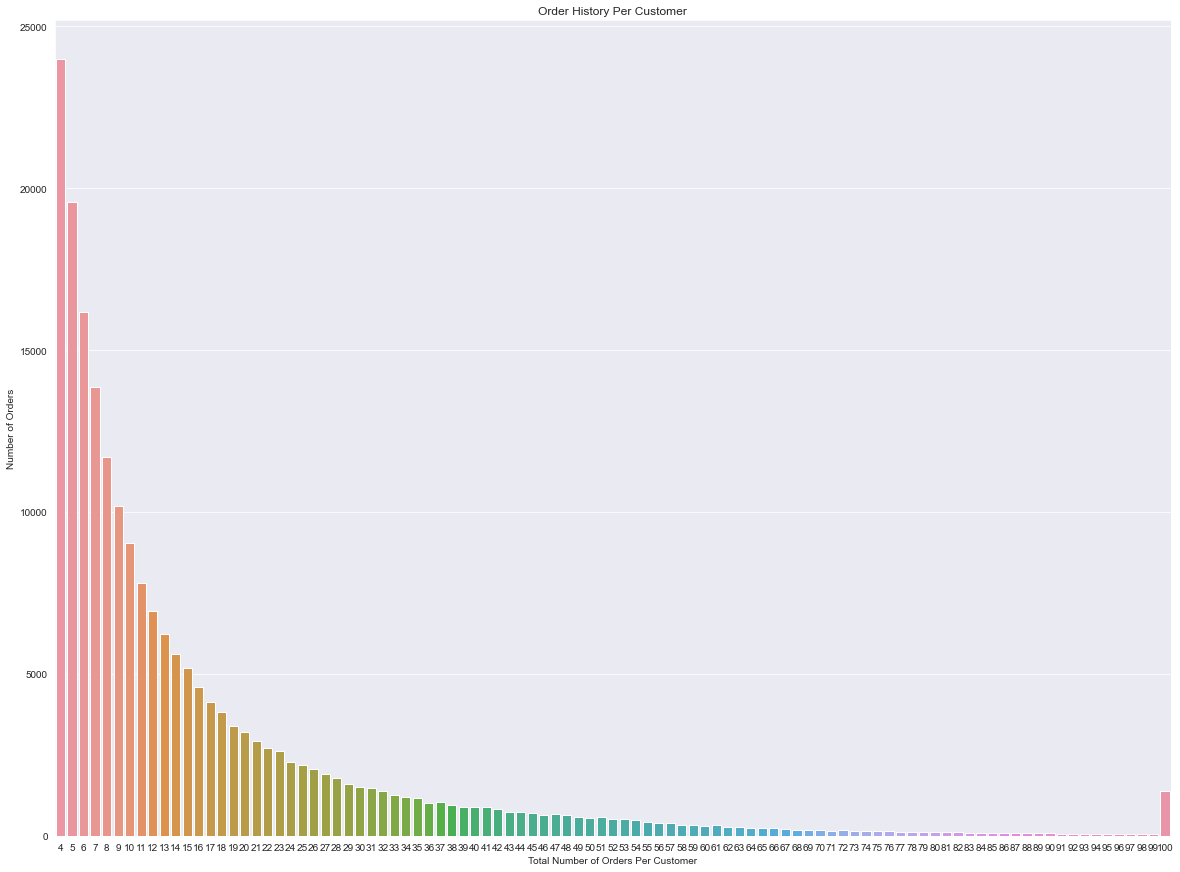

In [51]:
plt.figure(figsize=(20,15))
ax = sns.countplot(orders_percustomer['order_number'])
ax.set(xlabel = 'Total Number of Orders Per Customer', ylabel='Number of Orders')
plt.title("Order History Per Customer")


In [52]:
# extract all user IDs and how many order IDs they have attributed
order_stats = orders.groupby('user_id')['order_id'].nunique()
order_stats.head()

user_id
1    11
2    15
3    13
4     6
5     5
Name: order_id, dtype: int64

C:\Users\Mo\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


count    206209.000000
mean         16.590367
std          16.654774
min           4.000000
25%           6.000000
50%          10.000000
75%          20.000000
max         100.000000
Name: order_id, dtype: float64

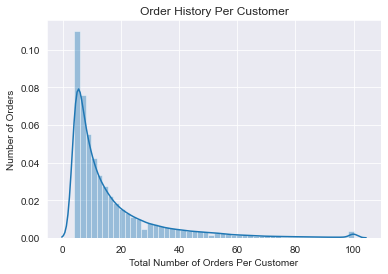

In [53]:
# Plot orders per user
x = sns.distplot(order_stats)
x.set(xlabel = 'Total Number of Orders Per Customer', ylabel='Number of Orders')
plt.title("Order History Per Customer")

# report mean order volume + stats
order_stats.describe()

Looks like the mean amount of number of orders a given customer will make is about 17 orders, though this is not a very strong average since we also have a standard deviation of about 17 orders.

Future Directions
=== 

This is a large dataset that informs on much of the eating behavior of many americans, specifically what kinds of foods they eat. This dataset can be incredibly useful when one wants to predict food related illnesses. These food related ilnesses can sometimes cause disease outbreaks that can have a global affect.

Public health agencies across the country have primary responsibility for identifying and investigating outbreaks and use a standard form to report outbreaks voluntarily to CDC. During 1998–2008, reporting was made through the electronic Foodborne Outbreak Reporting System (eFORS). This dataset includes confirmed and unconfirmed cases of infected cases from food related diseases. Additionally, in this data set we have access to the foods that caused the disease, the state/year/month they were in and how many illnesses were reported during that time frame.

In [54]:
outbreaks = pd.read_csv('/Users/Mo/Data Science/outbreaks.csv')
outbreaks.head()

,Year,Month,State,Location,Food,Ingredient,Species,Serotype/Genotype,Status,Illnesses,Hospitalizations,Fatalities
0,1998,January,California,Restaurant,NaN,NaN,NaN,NaN,NaN,20,0.0,0.0
1,1998,January,California,NaN,Custard,NaN,NaN,NaN,NaN,112,0.0,0.0
2,1998,January,California,Restaurant,NaN,NaN,NaN,NaN,NaN,35,0.0,0.0
3,1998,January,California,Restaurant,"Fish, Ahi",NaN,Scombroid toxin,NaN,Confirmed,4,0.0,0.0
4,1998,January,California,Private Home/Residence,"Lasagna, Unspecified; Eggs, Other",NaN,Salmonella enterica,Enteritidis,Confirmed,26,3.0,0.0


Whlie time constraints will not allow me to go in depth on fulily integrating this data set with the instacart dataset, I can nonethelles explain how I would go about doing so.

The key in the outbreak dataset is the food column as it is really the only related column to the instacart dataset. The problem arises when we try grouping certain foods on this outbreak dataset to the instacart dataset because they are quite different string values even though they might essentially mean the same thing.

The strategy here would be to extract all unique string values in the food coloumn for the instacart dataset and re-naming them in terms of how they are generally categorized in the outbreak dataset. For example, in the instacart dataset we have the item "Organic Egg Whites". We would change this string value to one that matches the outbreak dataset as "Eggs". This way we have can have a clear way of onverlapping the two datasets.

Before we fully integrate the two datasets, a useful thing to do first is to look at unconfirmed and confirmed instances in the outbreak dataset. In order to get useful data on the correalation between grocery consumer behavior and likeliness of food disease outbreak, we only want the data of confirmed cases to maximize accuracy in our predictions.

After this problem is solved, we should be able to extract some information about the risk of consumers (users) contracting certain diseases depending on which foods they purchase the most.